# Lab 5. Multivariate Analysis

### Intro and objectives
#### review multivariate analysis
### review methods to explore the distribution of discrete data

### In this lab you will learn:

3. Continuous-continuous
4. discrete-continuuous
5. discrete-discrete
6. many variables: parallel, manifold-based, pairgrid visualization
1. correlation, heatmaps
2. A note of caution: correlation is not causation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli,binom,poisson
from IPython.display import Latex
import scipy as sp
import pandas as pd
import seaborn as sns

## 0. Let's load the World Happiness Dataset

In [38]:
happinessDataFrame = pd.read_csv('../data/world-happiness-report-discrete.csv',parse_dates=['year'])

In [43]:
happinessDataFrame.drop('Unnamed: 0',inplace=True,axis=1)

In [44]:
happinessDataFrame.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,LevelGDP,LevelCorruption
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,LowGDP,Medium
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,LowGDP,Medium
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,LowGDP,Low
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,LowGDP,Low
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,LowGDP,Medium


In [45]:
happinessDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Country name                      1949 non-null   object        
 1   year                              1949 non-null   datetime64[ns]
 2   Life Ladder                       1949 non-null   float64       
 3   Log GDP per capita                1913 non-null   float64       
 4   Social support                    1936 non-null   float64       
 5   Healthy life expectancy at birth  1894 non-null   float64       
 6   Freedom to make life choices      1917 non-null   float64       
 7   Generosity                        1860 non-null   float64       
 8   Perceptions of corruption         1839 non-null   float64       
 9   Positive affect                   1927 non-null   float64       
 10  Negative affect                   1933 non-null 

## 1. Multivariate Analysis: continuous-continuous 
### 1.1 Correlation
#### Variables X and Y are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

In [46]:
happinessDataFrame.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


<AxesSubplot:>

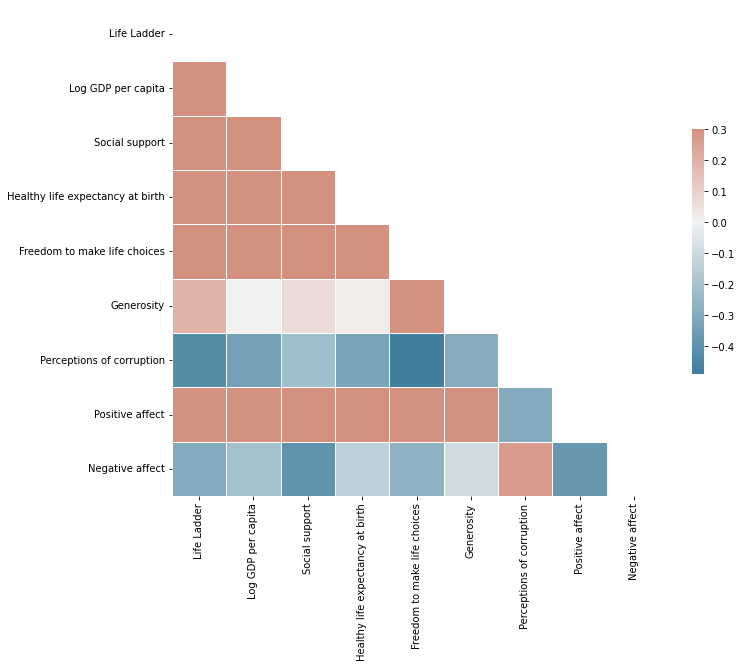

In [47]:
# Compute the correlation matrix
corr = happinessDataFrame.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### The previous result reveal:
#### 1. A strong and positive correlation between "Life Ladder" and: "Log GDP per capita", "Social support","Healthy life expectancy at birth", "Freedom to make choices" and "Positive affect"
#### 2. A strong and positive correlation between "Social support" and "Log GDP per capita"
#### 3. A strong and positive correlation between "Healthy life expectancy at birth" and "Social support"
#### 4. A strong and positive correlation between "Freedom to make choices" and "Healthy life expectancy at birth"
#### 5. A strong and positive correlation between "Generosity" and "Freedom to make choices"
#### 6. A moderate negative correlation between "Perceptions of corruption" and "Life ladder"
#### 7. A moderate negative correlation between "Perceptions of corruption" and "Freedom to make choices"


### 1.2 ScatterPlots
### Scatterplots are extremely useful to find relationships accross continuous variables

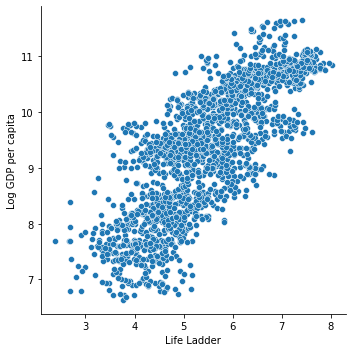

In [48]:
sns.relplot(x="Life Ladder", y="Log GDP per capita", data=happinessDataFrame);

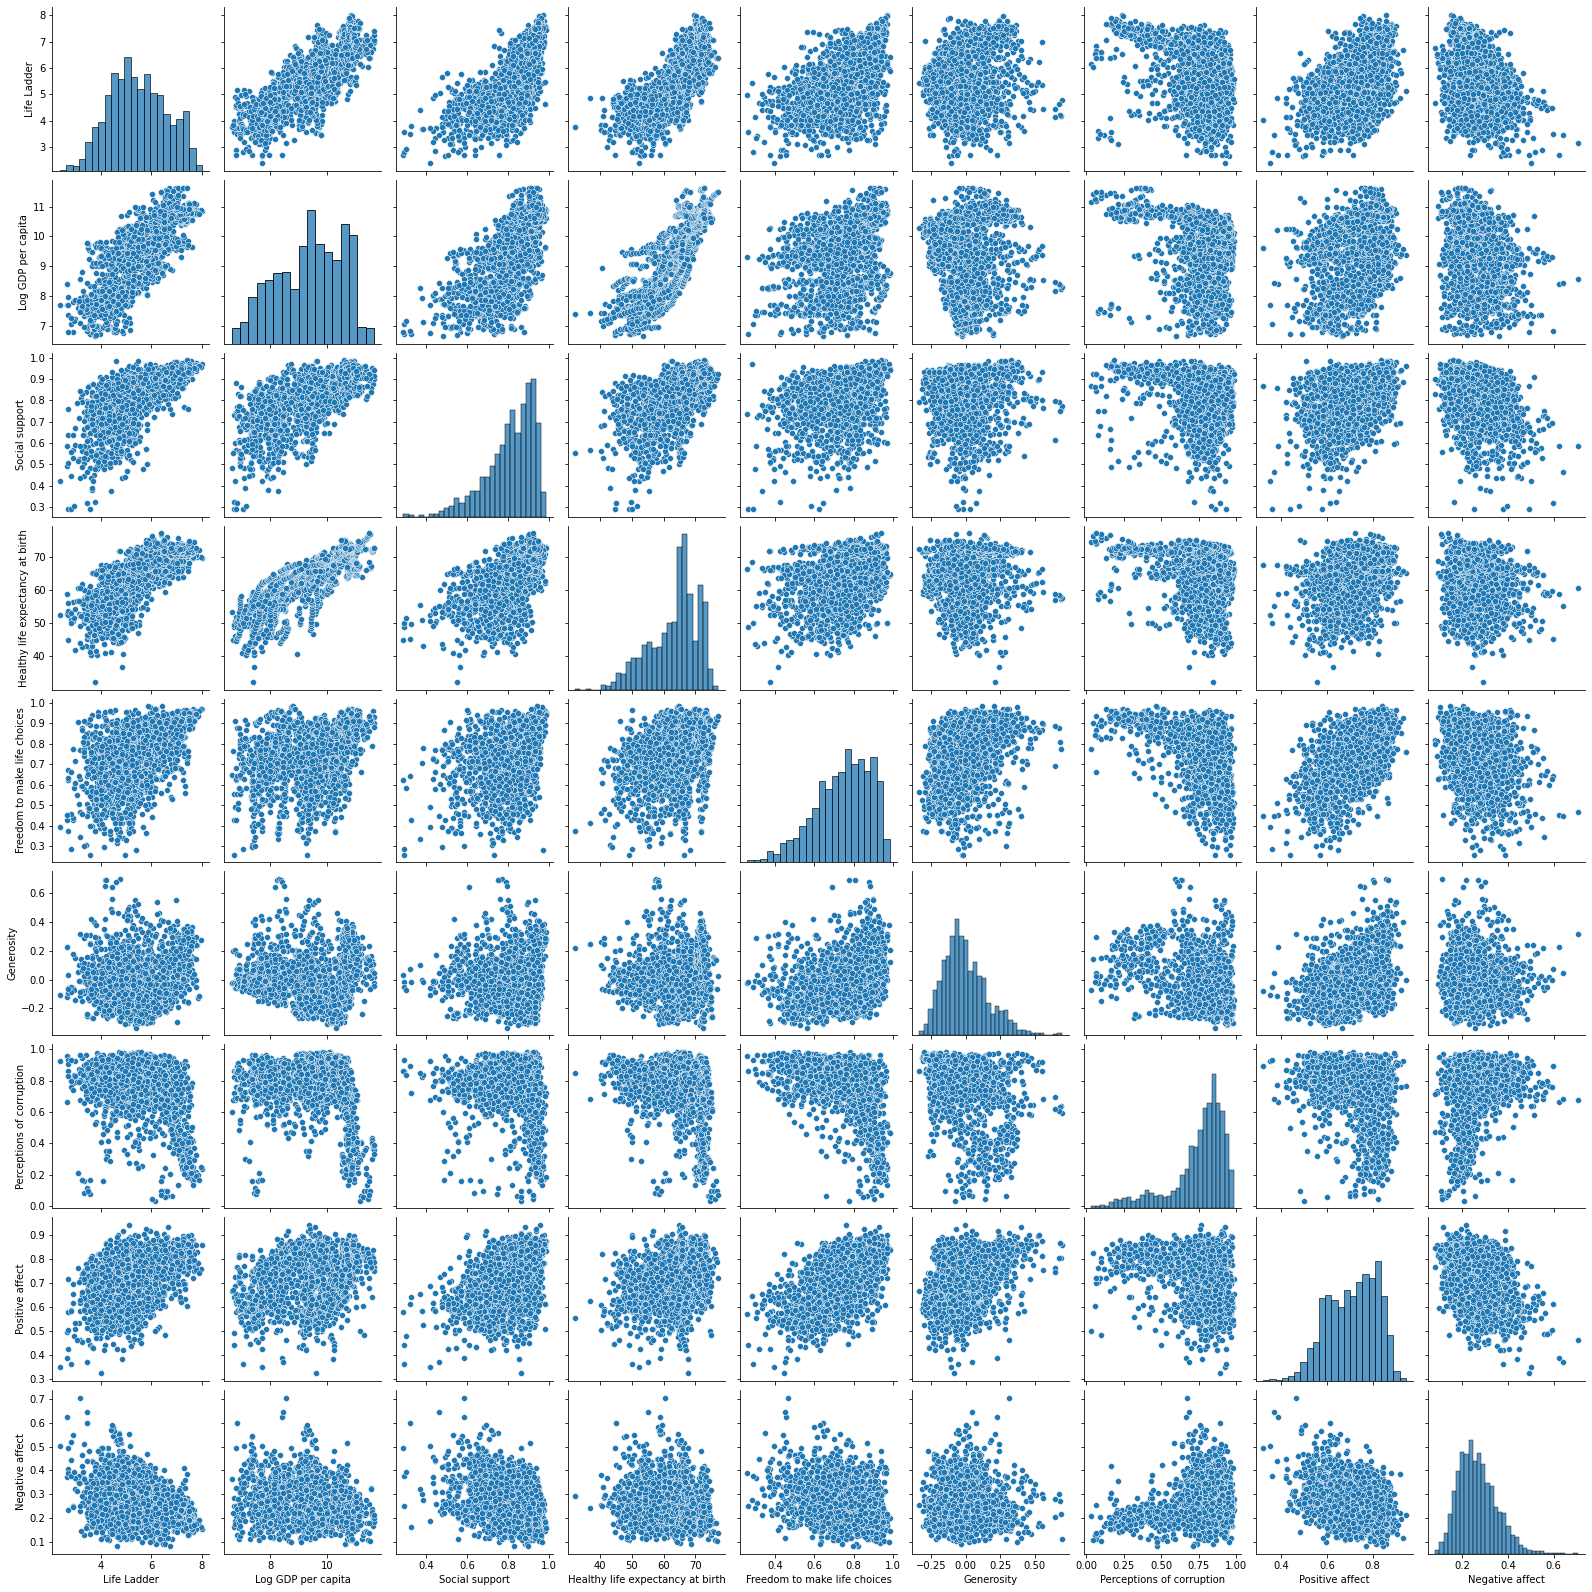

In [49]:
sns.pairplot(happinessDataFrame)

## 2. Multivariate Analysis: discrete-continuous 

### 2.1 ScatterPlots 
#### Scatterplots are also useful to observe relationships between discrete and continuous variables.
#### This time we control for the discrete variable

<AxesSubplot:xlabel='Life Ladder', ylabel='Healthy life expectancy at birth'>

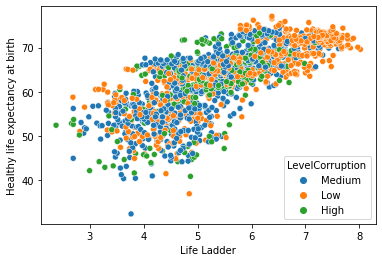

In [53]:
sns.scatterplot(data=happinessDataFrame, x="Life Ladder", y="Healthy life expectancy at birth", hue="LevelCorruption")

#### The previous figure reveals that higher levels of "Life Ladder" correspond to higher levels of "Healthy life expectancy". This relationship is moderated by the variable "Level of Corruption".

<AxesSubplot:xlabel='Log GDP per capita', ylabel='Life Ladder'>

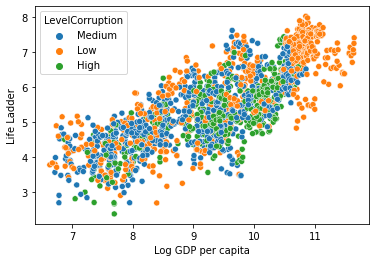

In [61]:
sns.scatterplot(data=happinessDataFrame, x="Log GDP per capita", y="Life Ladder", hue="LevelCorruption")

#### The previous figure reveals that higher levels of "Log GDP per capita" correspond to higher levels of "Life Ladder". This relationship is positively moderated by the variable "Level of Corrupion".

### 2.2 ViolinPlots 
#### ViolinPlots are also useful to observe relationships between discrete and continuous variables.
#### This time we control for the discrete variable

<AxesSubplot:xlabel='Life Ladder', ylabel='Healthy life expectancy at birth'>

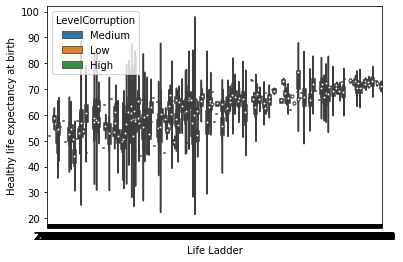

In [62]:
sns.violinplot(data=happinessDataFrame, x="Life Ladder", y="Healthy life expectancy at birth", hue="LevelCorruption")

In [63]:
happinessDataFrame

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,LevelGDP,LevelCorruption
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,LowGDP,Medium
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,LowGDP,Medium
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,LowGDP,Low
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,LowGDP,Low
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,LowGDP,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016-01-01,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,LowGDP,Low
1945,Zimbabwe,2017-01-01,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,LowGDP,Low
1946,Zimbabwe,2018-01-01,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,LowGDP,Medium
1947,Zimbabwe,2019-01-01,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,LowGDP,Medium
